In [0]:
#  !curl -s https://course.fast.ai/setup/colab | bash

To update fastai library

In [0]:
from fastai.vision import *
from fastai.widgets import *

In [3]:
!pip3 install starlette
!pip3 install uvicorn

In [0]:
from starlette.applications import Starlette
from starlette.responses import JSONResponse
import uvicorn

app = Starlette(debug=True)

In [0]:
classes = ['big_cats','domestic cats']

In [0]:
folder = 'big_cats'
#file = 'big_cats.txt'

The file contains the url links of the google images to be downloaded. It is already provided in the previous directory

In [0]:
path = Path('data/cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
#download_images(path/file, dest, max_pics=1000)

For downloading images

In [0]:
folder = 'domestic cats'
#file = 'domestic.txt'

The file contains the url links of the google images to be downloaded. It is already provided in the previous directory

In [0]:
path = Path('data/cats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
#download_images(path/file, dest, max_pics=1000)

For downloading images

In [11]:
path.ls()

[PosixPath('data/cats/domestic.txt'),
 PosixPath('data/cats/cleaned.csv'),
 PosixPath('data/cats/big_cats.txt'),
 PosixPath('data/cats/.ipynb_checkpoints'),
 PosixPath('data/cats/models'),
 PosixPath('data/cats/domestic cats'),
 PosixPath('data/cats/export.pkl'),
 PosixPath('data/cats/big_cats')]

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [16]:
data.classes

['big_cats', 'domestic cats']

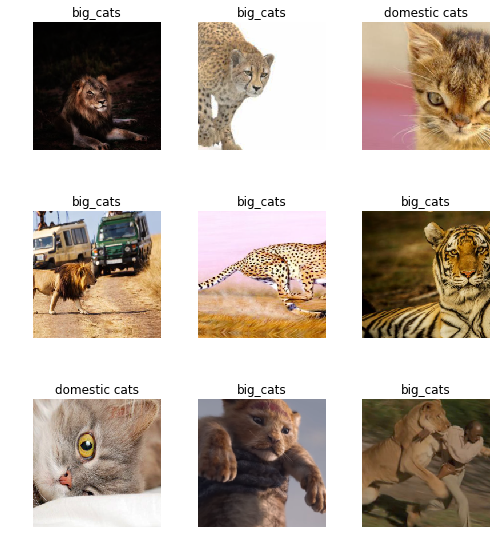

In [16]:
data.show_batch(rows=3, figsize=(7,8))

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['big_cats', 'domestic cats'], 2, 1460, 365)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.319176,0.076844,0.030137,0.969863,00:24
1,0.169281,0.069833,0.021918,0.978082,00:24
2,0.117068,0.081619,0.019178,0.980822,00:24
3,0.085376,0.082044,0.024658,0.975342,00:24


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
#learn.lr_find()
#learn.recorder.plot()

To find the most suitable learning rate

In [24]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.059673,0.145040,0.046575,0.953425,00:25
1,0.057891,0.077198,0.019178,0.980822,00:25


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

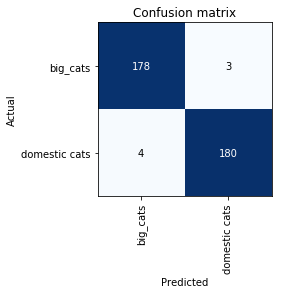

In [28]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn = load_learner(path)

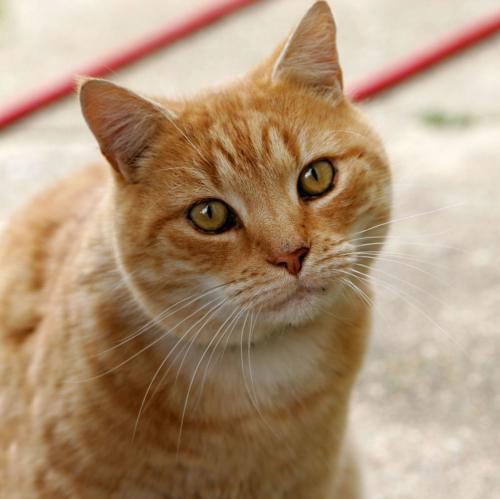

In [35]:
img = open_image(path/'domestic cats'/'00000031.jpg')
img

In [36]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category domestic cats

In [0]:
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })